In [90]:
import os
import pandas as pd
import glob
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from dotenv import load_dotenv

In [91]:
# Read in all the CSV files and combine the data into one Data Frame

base_directory = r'C:\Users\kdiaz\OneDrive\Documents\Personal\Random Code\Happiness_Reports'
csv_folder = 'raw_data'
csv_folder_path = os.path.abspath(os.path.join(base_directory, csv_folder))
csv_files = glob.glob(os.path.join(csv_folder_path, '*.csv'))

# Initialize an empty list to hold DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    year = file.split('_')[-1].split('.')[0]  # Extract year from file name
    df['Year'] = int(year)
    dfs.append(df)

# Combine all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [92]:
#Sample the data to understand given categories and values
df.sample(15)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
1336,Ghana,Sub-Saharan Africa,4.605,1.10100,0.75600,0.19700,0.52600,0.21100,0.03500,2023
264,Nepal,South Asia,4.793,0.44626,0.69699,0.50073,0.37012,0.38160,0.07008,2016
688,Paraguay,Latin America and Caribbean,5.743,0.85500,1.47500,0.77700,0.51400,0.18400,0.08000,2019
26,Chile,Latin America and Caribbean,6.670,1.10715,1.12447,0.85857,0.44132,0.33363,0.12869,2015
1024,Azerbaijan,Central and Eastern Europe,5.171,1.02500,0.84100,0.54100,0.52600,0.04300,0.27600,2021
956,Bahrain,Middle East and North Africa,6.647,1.40900,0.89900,0.66200,0.66100,0.24600,0.13900,2021
72,Estonia,Central and Eastern Europe,5.429,1.15174,1.22791,0.77361,0.44888,0.08680,0.15184,2015
1051,Mali,Sub-Saharan Africa,4.723,0.38700,0.59000,0.11000,0.38400,0.16400,0.07200,2021
995,Philippines,Southeast Asia,5.880,0.85300,0.82800,0.42600,0.65100,0.12500,0.12600,2021
743,Guinea,Sub-Saharan Africa,4.534,0.38000,0.82900,0.37500,0.33200,0.20700,0.08600,2019


In [93]:
# Generate basic statistics on the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
happiness_score,1367.0,5.441086,1.117909,1.859,4.599500,5.44000,6.256300,7.842000
gdp_per_capita,1367.0,1.019422,0.453703,0.000,0.696326,1.04300,1.338473,2.209000
social_support,1367.0,1.045334,0.331163,0.000,0.832022,1.08300,1.299985,1.644000
healthy_life_expectancy,1366.0,0.584043,0.245117,0.000,0.402301,0.61283,0.777614,1.141000
freedom_to_make_life_choices,1367.0,0.450771,0.156733,0.000,0.356000,0.46761,0.568685,0.772000
generosity,1367.0,0.196260,0.113301,0.000,0.115000,0.18270,0.252858,0.838075
perceptions_of_corruption,1366.0,0.132275,0.112555,0.000,0.056826,0.09700,0.165945,0.587000
Year,1367.0,2018.903438,2.561006,2015.000,2017.000000,2019.00000,2021.000000,2023.000000


In [94]:
# Descriptive Statistics
print(df.describe(include='all'))

       country              region  happiness_score  gdp_per_capita  \
count     1367                1367      1367.000000     1367.000000   
unique     171                  11              NaN             NaN   
top     Cyprus  Sub-Saharan Africa              NaN             NaN   
freq        11                 337              NaN             NaN   
mean       NaN                 NaN         5.441086        1.019422   
std        NaN                 NaN         1.117909        0.453703   
min        NaN                 NaN         1.859000        0.000000   
25%        NaN                 NaN         4.599500        0.696326   
50%        NaN                 NaN         5.440000        1.043000   
75%        NaN                 NaN         6.256300        1.338473   
max        NaN                 NaN         7.842000        2.209000   

        social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
count      1367.000000              1366.000000                   

In [95]:
# Check for null values
pd.isnull(df).sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
Year                            0
dtype: int64

In [96]:
# Drop the null values and re-check to ensure data correction
df.dropna(how='any', inplace=True)
pd.isnull(df).sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
Year                            0
dtype: int64

In [97]:
# Check how many duplicated values are in the data
df.duplicated().sum()

np.int64(0)

In [124]:
# Drop rows with NaN values
df.dropna(inplace=True)

# Check if NaN values are removed
print("NaN values after dropping:")
print(df.isna().sum())

NaN values after dropping:
Country                         0
Region                          0
Happiness_Score                 0
GDP_Per_Capita                  0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_To_Make_Life_Choices    0
Generosity                      0
Perceptions_Of_Corruption       0
Year                            0
dtype: int64


In [125]:
# Export the combined DataFrame to a new CSV file
df.to_csv('combined_data.csv', index=False)

In [126]:
# Load environment variables from .env file
load_dotenv()

# Retrieve database credentials from environment variables
user = os.getenv('DB_USER')
password = quote_plus(os.getenv('DB_PASSWORD'))
host = os.getenv('DB_HOST')
database = os.getenv('DB_NAME')

# Create the connection string
connection_string = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Create the connection
engine = create_engine(connection_string)

# Set the base directory path
base_directory = r'C:\Users\kdiaz\OneDrive\Documents\Personal\Random Code\Happiness_Reports'

# Set the CSV file name and folder
csv_folder = 'clean_data'
csv_file_name = 'combined_data.csv'

# Create the full path to the CSV file
csv_file_path = os.path.abspath(os.path.join(base_directory, csv_folder, csv_file_name))

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Map the column names in the DataFrame to the column names in the MySQL table
column_mapping = {
    'country': 'Country',
    'region': 'Region',
    'happiness_score': 'Happiness_Score',
    'gdp_per_capita': 'GDP_Per_Capita',
    'social_support': 'Social_Support',
    'healthy_life_expectancy': 'Healthy_Life_Expectancy',
    'freedom_to_make_life_choices': 'Freedom_To_Make_Life_Choices',
    'generosity': 'Generosity',
    'perceptions_of_corruption': 'Perceptions_Of_Corruption',
    'year': 'Year'
}

# Rename columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# Insert DataFrame into MySQL table
df.to_sql('happiness_data', con=engine, if_exists='replace', index=False)


1367

In [127]:
# Find the top 5 happiest countries per year from 2015 - 2023

query_top_5_per_year = '''
WITH top5 AS (
    SELECT 
        Year,
        Country,
        Happiness_Score,
        ROW_NUMBER() OVER (PARTITION BY Year ORDER BY Happiness_Score DESC) AS `rank`
    FROM 
        happiness_data
)
SELECT 
    Year,
    Country,
    Happiness_Score
FROM
    top5
WHERE
    `rank` < 6;
'''
top_5_happiest = pd.read_sql(query_top_5_per_year, engine)
print(top_5_happiest)

    Year      Country  Happiness_Score
0   2015  Switzerland           7.5870
1   2015      Iceland           7.5610
2   2015      Denmark           7.5270
3   2015       Norway           7.5220
4   2015       Canada           7.4270
5   2016      Denmark           7.5260
6   2016  Switzerland           7.5090
7   2016      Iceland           7.5010
8   2016       Norway           7.4980
9   2016      Finland           7.4130
10  2017       Norway           7.5370
11  2017      Denmark           7.5220
12  2017      Iceland           7.5040
13  2017  Switzerland           7.4940
14  2017      Finland           7.4690
15  2018      Finland           7.6320
16  2018       Norway           7.5940
17  2018      Denmark           7.5550
18  2018      Iceland           7.4950
19  2018  Switzerland           7.4870
20  2019      Finland           7.7690
21  2019      Denmark           7.6000
22  2019       Norway           7.5540
23  2019      Iceland           7.4940
24  2019  Netherlands    

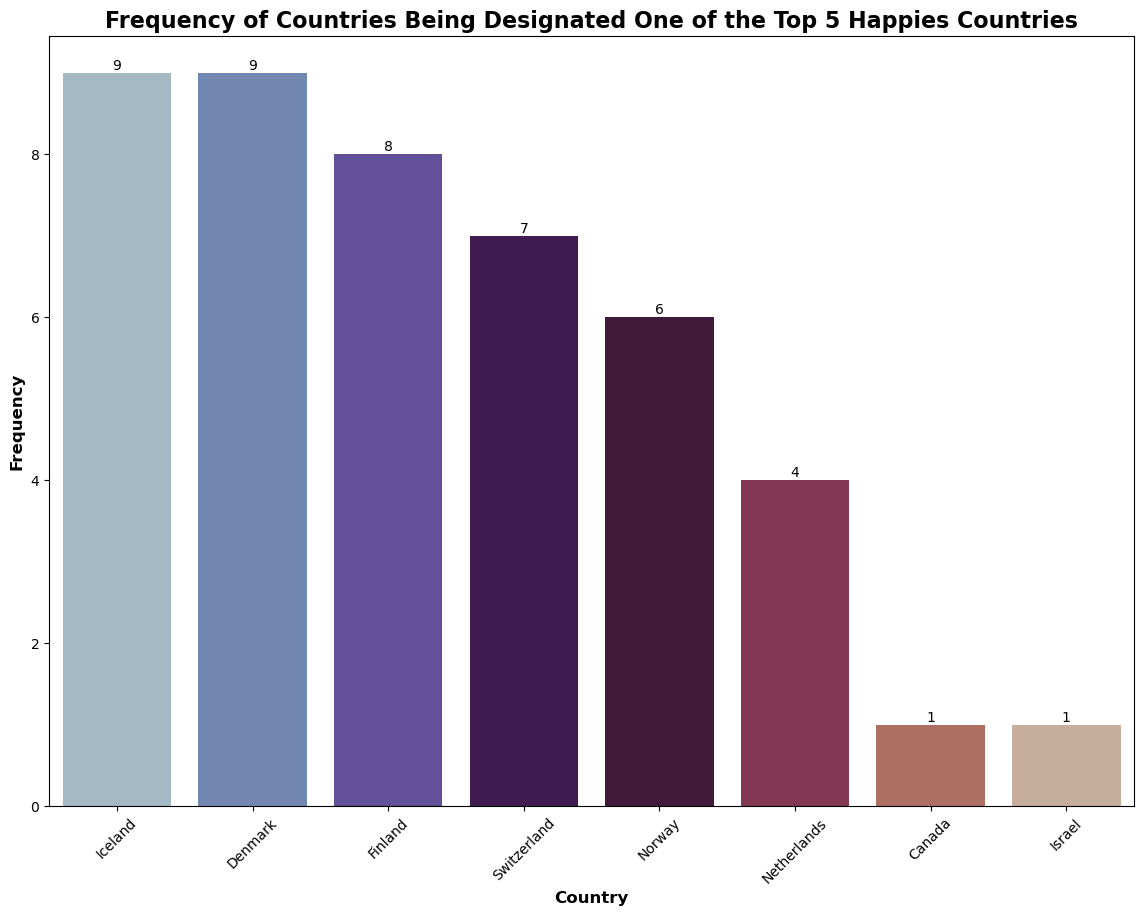

In [128]:
# Chart the frequency of the happiest countries being in the top 5

query_top_5_per_year = '''
WITH top5 AS (
    SELECT 
        Year,
        Country,
        Happiness_Score,
        ROW_NUMBER() OVER (PARTITION BY Year ORDER BY Happiness_Score DESC) AS `rank`
    FROM 
        happiness_data
)
SELECT 
    Year,
    Country,
    Happiness_Score
FROM
    top5
WHERE
    `rank` < 6;'''

top_5_happiest = pd.read_sql(query_top_5_per_year, engine)
country_frequency = top_5_happiest['Country'].value_counts()
plt.figure(figsize=(14,10))
fig = sns.barplot(x=country_frequency.index, y=country_frequency.values, hue=country_frequency.index, palette='twilight', legend=False)
plt.title('Frequency of Countries Being Designated One of the Top 5 Happies Countries', size=16, weight='bold')
plt.xlabel('Country', size=12, weight='semibold')
plt.ylabel('Frequency', size=12, weight='semibold')
plt.xticks(rotation=45)
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

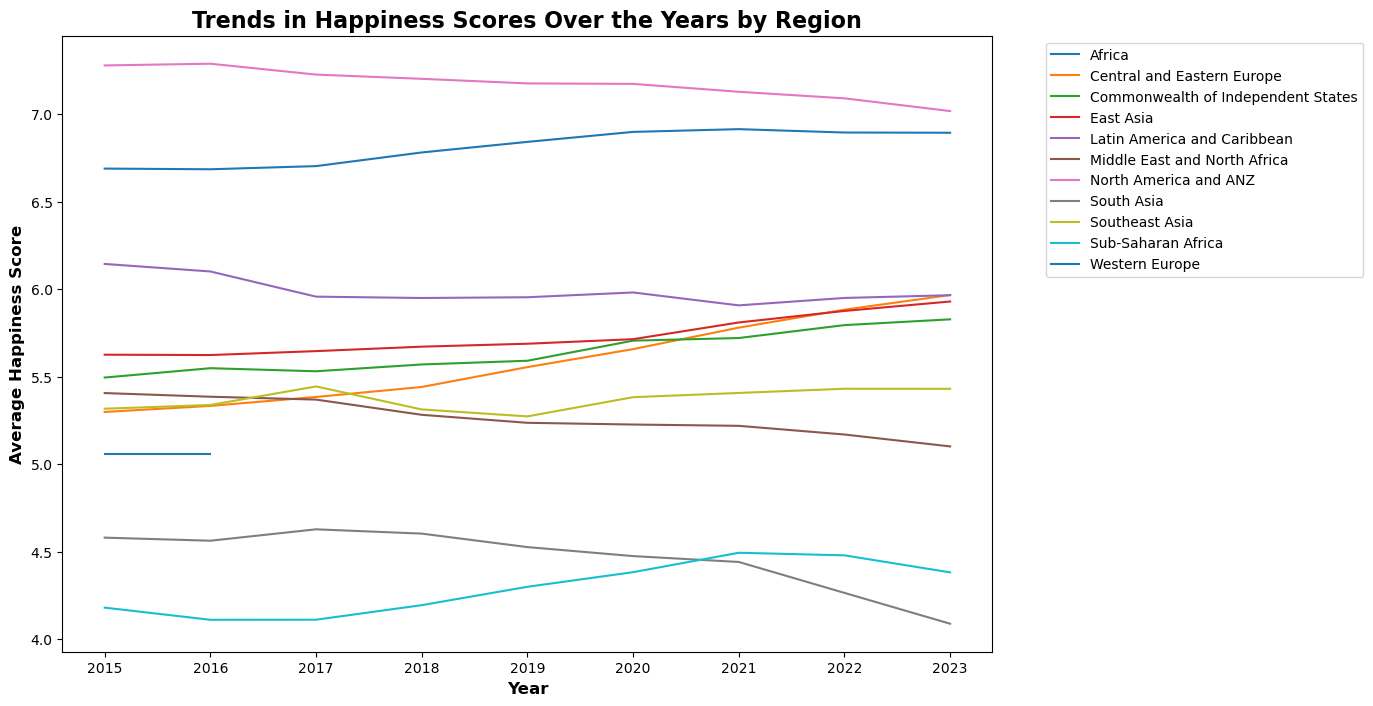

In [129]:
# Analyze happiness trends by region over the years

query_trend_analysis = '''
SELECT 
    Year,
    Region,
    AVG(Happiness_Score) AS Avg_Happiness_Score
FROM 
    happiness_data
GROUP BY 
    Year, Region
ORDER BY 
    Year, Region; '''

# Execute the query
trend_data = pd.read_sql(query_trend_analysis, engine)

# Plotting the trend analysis
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_data, x='Year', y='Avg_Happiness_Score', hue='Region', palette='tab10')
plt.title('Trends in Happiness Scores Over the Years by Region', size=16, weight='bold')
plt.xlabel('Year', size=12, weight='semibold')
plt.ylabel('Average Happiness Score', size=12, weight='semibold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

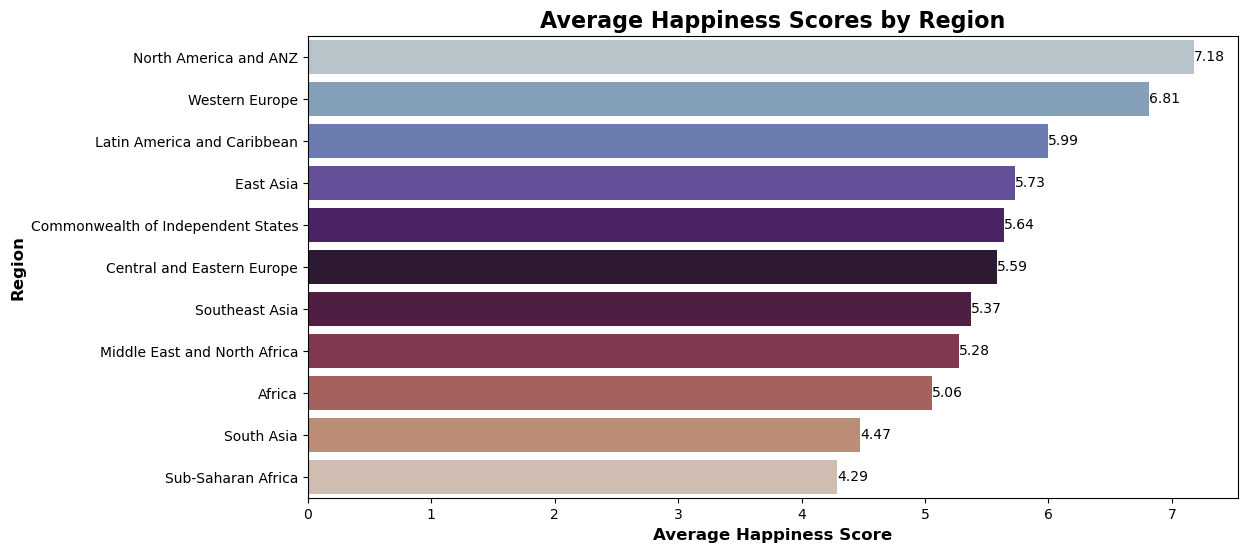

In [130]:
# Average Happiness Scores by Region 

query_regional_analysis = '''
SELECT
    Region,
    AVG(Happiness_Score) AS Avg_Happiness_Score
FROM 
    happiness_data
GROUP BY 
    Region
ORDER BY 
    Avg_Happiness_Score DESC;
'''

# Execute the query
regional_data = pd.read_sql(query_regional_analysis, engine)

# Plotting the regional analysis
plt.figure(figsize=(12, 6))
fig = sns.barplot(data=regional_data, x='Avg_Happiness_Score', y='Region', hue='Region', palette='twilight', legend=False)
plt.title('Average Happiness Scores by Region', size=16, weight='bold')
plt.xlabel('Average Happiness Score', size=12, weight='semibold')
plt.ylabel('Region', size=12, weight='semibold')
for i in fig.containers:
    fig.bar_label(i, fmt='%.2f')
plt.show()


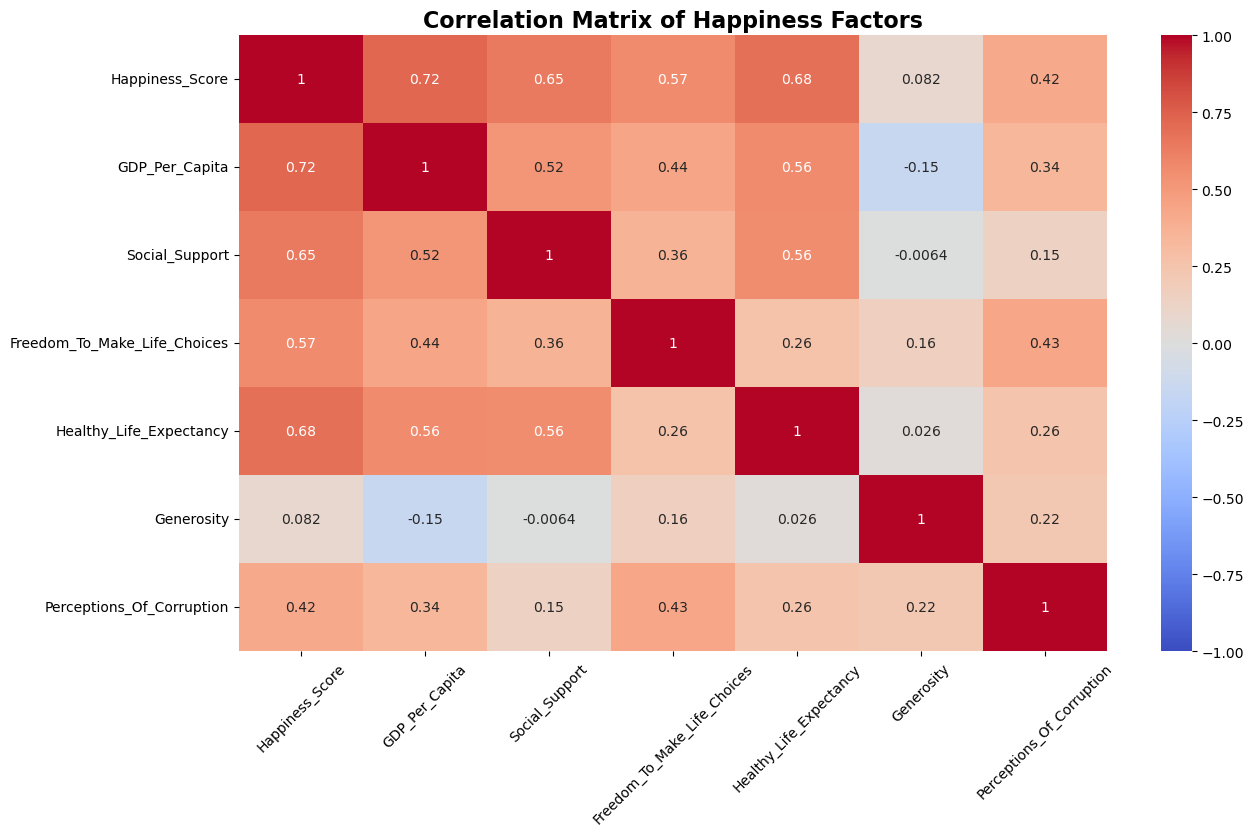

In [131]:
# Mapping Correlations using a Heatmap

query_data = '''
SELECT 
    Happiness_Score,
    GDP_Per_Capita,
    Social_Support,
    Freedom_To_Make_Life_Choices,
    Healthy_Life_Expectancy,
    Generosity,
    Perceptions_Of_Corruption
FROM 
    happiness_data
'''

# Read data into pandas DataFrame
data = pd.read_sql(query_data, engine)
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Happiness Factors', size=16, weight='bold')
plt.xticks(rotation=45)
plt.show()